# **PHASE 4 PRJECT**

# **1.0 Business Understanding**  

### **1.1 Overview**  
Movie recommendation systems are widely used by streaming services, e-commerce platforms, and online review sites to enhance user engagement and satisfaction. The goal of this project is to build a recommendation system using the **MovieLens dataset**, a well-known dataset in academic and machine learning research, to provide **personalized movie recommendations** based on user ratings.   

### **1.2 Problem Statement**  
Users often struggle to find movies that match their interests due to the overwhelming number of choices available. A personalized recommendation system can **improve user experience** by suggesting movies based on their past ratings.  

**Key Questions:**  
- How can we predict a user's movie preferences based on past ratings?  
- How can we ensure recommendations are relevant, diverse, and personalized?  
- How can we handle new users with limited rating history (cold start problem)? 

### **1.3 Challenges and Business Problems**  
- **Cold Start Problem**: How to recommend movies for new users who have rated very few (or no) movies?  
- **Scalability**: Handling large datasets with millions of ratings.  
- **Diversity vs. Accuracy**: Ensuring recommendations are not just popular movies but also personalized.  
- **Data Sparsity**: Most users have only rated a small subset of movies.  

### **1.4 Objectives**  
- Develop a **collaborative filtering-based** recommendation system to suggest movies.  
- Evaluate the model using metrics such as **RMSE, MAE**, and ranking-based metrics.  
- Address the **cold start problem** using a hybrid approach (optional).  

### **1.5 Proposed Solutions / Research Questions**  
1. **Collaborative Filtering Approach**  
   - Use **User-based** or **Item-based** collaborative filtering.  
   - Implement **Matrix Factorization techniques** (SVD, ALS, etc.).  

2. **Hybrid Model (Optional)**  
   - Combine collaborative filtering with **content-based filtering** to handle cold start users.  

3. **Evaluation Metrics**  
   - Use **RMSE (Root Mean Square Error)** and **MAE (Mean Absolute Error)** to measure accuracy.  
   - Consider **Precision@K and Recall@K** for ranking-based evaluation. 

### **1.6 Brief Solutions**  
- Load and preprocess the **MovieLens dataset** (ratings, movies, tags, and links).  
- Implement **collaborative filtering** using `Surprise` or `scikit-learn`.  
- Optimize model performance and **tune hyperparameters**.  
- Evaluate recommendations using **relevant metrics**.  
- If time permits, enhance the system using **content-based filtering** for new users.  


# **2.0 Data Understanding**  

This section focuses on exploring the **MovieLens dataset**, understanding its structure, and identifying key insights for building an effective recommendation system.  

In [1]:
# %pip install --upgrade matplotlib seaborn

In [2]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# print("matplotlib and seaborn imported successfully")

In [3]:
# %pip install scikit-learn

In [4]:
# %pip install tensorflow

In [5]:
# %pip install torch

### **Importing libraries**

In [6]:
import pandas as pd         # Data manipulation
import numpy as np          # Numerical computations
import matplotlib.pyplot as plt    # Basic plotting
import seaborn as sns              # Advanced visualization
from surprise import Dataset, Reader      # Load MovieLens dataset into Surprise
from surprise import SVD, KNNBasic, KNNWithMeans  # Collaborative Filtering models
from surprise import accuracy             # RMSE, MAE evaluation
from surprise.model_selection import train_test_split, cross_validate  # Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # RMSE, MAE, R-squared calculation
from sklearn.decomposition import TruncatedSVD # Matrix factorization
import tensorflow as tf      # Deep learning framework
from tensorflow import keras # Building neural network models
import torch                 # Alternative deep learning library (PyTorch)
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text (tags/genres) into numerical format
from sklearn.metrics.pairwise import cosine_similarity       # Compute movie similarity
from sklearn.cluster import KMeans                           # Clustering
from sklearn.preprocessing import StandardScaler             # Standardization
from sklearn.pipeline import make_pipeline                  # Combine multiple preprocessing steps
from sklearn.manifold import TSNE                            # Dimensionality reduction
from sklearn.decomposition import PCA                        # Dimensionality reduction
from sklearn.metrics import silhouette_score                 # Evaluate clustering
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold  # Hyperparameter tuning, Train/test split, Cross-validation
from sklearn.ensemble import RandomForestRegressor           # Random Forest
from sklearn.linear_model import LinearRegression            # Linear Regression
from sklearn.svm import SVR                                  # Support Vector Machine

### **2.1 Load the Datasets**  
- Load all four datasets (`movies.csv`, `ratings.csv`, `tags.csv`, `links.csv`).  
- Display the first few rows (`df.head()`) to understand their structure.  
- Check the number of records in each dataset (`df.shape`).  

In [7]:
# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')


In [8]:
# Display first few rows of each dataset
print("Movies Dataset:")
display(movies.head())

print("Ratings Dataset:")
display(ratings.head())

print("Tags Dataset:")
display(tags.head())

print("Links Dataset:")
display(links.head())

Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Tags Dataset:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Links Dataset:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
# Check the number of records in each dataset
print("\nNumber of records in each dataset:")
print(f"Movies: {movies.shape[0]} records")
print(f"Ratings: {ratings.shape[0]} records")
print(f"Tags: {tags.shape[0]} records")
print(f"Links: {links.shape[0]} records")


Number of records in each dataset:
Movies: 9742 records
Ratings: 100836 records
Tags: 3683 records
Links: 9742 records


### **2.2 Check Data Types & Missing Values**  
- Identify **data types** of each column (`df.info()`).  
- Check for **null/missing values** (`df.isnull().sum()`).  
- Decide how to handle missing values (drop, impute, or replace).  

In [10]:
print(movies.info())  
print(movies.isnull().sum())  # Check for missing values  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
movieId    0
title      0
genres     0
dtype: int64


In [11]:
print(ratings.info())  
print(ratings.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [12]:
print(tags.info())  
print(tags.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [13]:
print(links.info())  
print(links.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### **2.3 Summary Statistics & Distribution Analysis**  
- **Basic statistics** on numerical columns (`df.describe()`).  
- **Rating distribution** (How are ratings spread across movies and users?).  
- **Most frequently rated movies** and **average ratings per movie**.

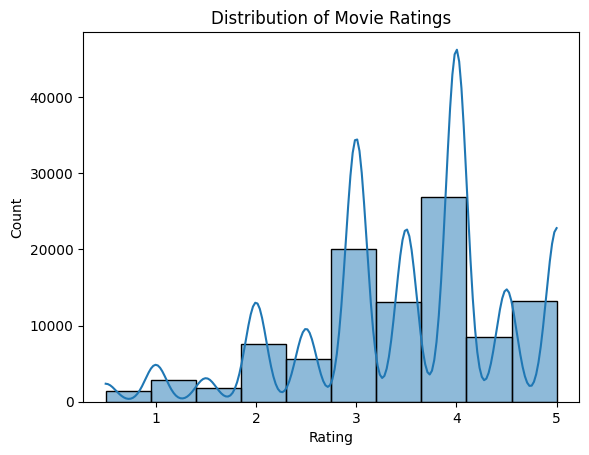

In [14]:
# Distribution of ratings
sns.histplot(ratings["rating"], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### **2.4 Data Relationships & Merging**  
- Identify how datasets are related (primary & foreign keys).  
- Merge **`ratings.csv`** with **`movies.csv`** on `movieId`.  
- Optionally, merge **`tags.csv`** and **`links.csv`** if needed for a hybrid approach. 

In [15]:
# df = ratings.merge(movies, on="movieId")
# df = df.merge(tags, on=["userId", "movieId"], how="left")  # Optional
# df_movies = df.merge(links, on="movieId", how="left")  # Optional

# Merge ratings with movies
merged_df = pd.merge(ratings, movies, on='movieId', how='left')

# Merge with tags
merged_df = pd.merge(merged_df, tags[['userId', 'movieId', 'tag']], on=['userId', 'movieId'], how='left')

# Merge with links
df_movies = pd.merge(merged_df, links, on='movieId', how='left')

# Display the first few rows
print("Combined Dataset:")
display(df_movies.head())

Combined Dataset:


,userId,movieId,rating,timestamp,title,genres,tag,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,114814,629.0


### **2.5 Identify Data Sparsity (Collaborative Filtering Concern)**  
- Check the **number of ratings per user** (some users rate very few movies).  
- Check the **number of ratings per movie** (some movies have very few ratings).  
- Consider filtering out users/movies with extremely few ratings to improve recommendation quality. 

In [16]:
# Count ratings per user
user_ratings_count = ratings.groupby("userId")["rating"].count()

# Count ratings per movie
movie_ratings_count = ratings.groupby("movieId")["rating"].count()

print(user_ratings_count.describe())  # Check distribution
print(movie_ratings_count.describe())  # Check distribution

# Number of unique users and movies
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_ratings = len(ratings)

# Compute sparsity
sparsity = (num_ratings / (num_users * num_movies)) * 100
print(f"\nDataset Sparsity: {sparsity:.2f}%")

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating, dtype: float64

Dataset Sparsity: 1.70%


### **2.6 Understanding Genres & Tags (For Hybrid Approach)**  
- **Break down genres** (each movie can belong to multiple genres).  
- **Explore tags** (user-generated labels that can be used for content-based filtering). 

In [17]:
# # Convert genres to a list
# movies["genres"] = movies["genres"].apply(lambda x: x.split('|'))
# print(movies.head())

# # Most common tags
# print(tags["tag"].value_counts().head(10))

In [18]:
df_movies

,userId,movieId,rating,timestamp,title,genres,tag,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,114814,629.0
...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,NaN,4972582,381288.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,NaN,5052448,419430.0
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,NaN,3315342,263115.0


### **Understanding the Columns After Merging All Datasets**  

>#### **1. User-Movie Interaction**  
- `userId`: Unique identifier for each user (used for tracking ratings and tags).  
- `movieId`: Unique identifier for each movie (links all datasets together).  
- `rating`: User’s rating for a movie (scale: 0.5 to 5.0).  
- `timestamp`: Time when the rating was given (UNIX format).  

>#### **2. Movie Metadata**  
- `title`: Full movie title, including release year (e.g., *Toy Story (1995)*).  
- `genres`: List of movie genres separated by `|` (e.g., "Action|Adventure").  
- `imdbId`: IMDb identifier for fetching additional movie details.  
- `tmdbId`: The Movie Database (TMDb) identifier for integration with external APIs.  

>#### **3. Content-Based Filtering Features**  
- `tag`: User-generated tag for a movie (e.g., "classic sci-fi", "mind-blowing").  
- `genres`: Used to determine movie similarity using **TF-IDF** and **cosine similarity**.  

>#### **4. Additional Insights**  
- `userId` and `movieId` are critical for **collaborative filtering**.  
- `rating` is the main feature for **training the recommendation model**.  
- `timestamp` allows for **time-based trend analysis** (e.g., user preferences over time).  
- `imdbId` and `tmdbId` help in **fetching external metadata** such as posters, cast, and reviews.  


### **Key Takeaways from Data Understanding**  
- Summarize key findings about dataset characteristics.  
- Highlight any **potential challenges** (e.g., sparse ratings, missing values, cold start problem).  
- Decide which parts of the dataset will be used in modeling.  


# **3.0 Data Preparation**  

Now that all datasets are merged into **`df_movies`**, I will follow these structured steps to clean and prepare the data for the recommendation system.  

### **3.1 Handling Missing Values**  
I will first check for missing values and then handle them appropriately.  



In [19]:
# Check for missing values in each column
df_movies.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          99201
imdbId           0
tmdbId          13
dtype: int64

In [20]:
# Drop rows where 'tmdbId' is missing
df_movies.dropna(subset=['tmdbId'], inplace=True)

# Fill missing 'tag' values with an empty string
df_movies['tag'].fillna("", inplace=True)


C:\Users\Edwin George\AppData\Local\Temp\ipykernel_18048\3224244720.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies['tag'].fillna("", inplace=True)


### **3.2 Data Type Conversion**  
I will convert data types to optimize performance and ensure consistency.  

In [21]:
# Convert timestamp to datetime format
df_movies['timestamp'] = pd.to_datetime(df_movies['timestamp'], unit='s')

# Extract year and month for time-based analysis
df_movies['year'] = df_movies['timestamp'].dt.year
df_movies['month'] = df_movies['timestamp'].dt.month

# Convert userId and movieId to integer type
df_movies['userId'] = df_movies['userId'].astype(int)
df_movies['movieId'] = df_movies['movieId'].astype(int)
df_movies.head()

,userId,movieId,rating,timestamp,title,genres,tag,imdbId,tmdbId,year,month
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,,114709,862.0,2000,7
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,,113228,15602.0,2000,7
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,,113277,949.0,2000,7
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,,114369,807.0,2000,7
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,,114814,629.0,2000,7


In [22]:
# Check for missing values in each column
df_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
imdbId       0
tmdbId       0
year         0
month        0
dtype: int64

### **3.3 Handling Duplicates**  
I will remove duplicate entries to avoid redundant data.  


In [23]:
# Check for duplicates in the df_movie dataset
duplicates = df_movies.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows
duplicate_rows = df_movies[df_movies.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp, title, genres, tag, imdbId, tmdbId, year, month]
Index: []


In [24]:
# # Remove duplicate ratings
# df_movies.drop_duplicates(subset=['userId', 'movieId', 'rating'], inplace=True)

# # Remove duplicate tags
# df_movies.drop_duplicates(subset=['userId', 'movieId', 'tag'], inplace=True)


### **3.4 Encoding Genres for Content-Based Filtering**  
To use genres in content-based filtering, I will apply **One-Hot Encoding**.  

In [25]:
# Convert genres into separate columns (One-Hot Encoding)
df_genres = df_movies['genres'].str.get_dummies(sep='|')

# Concatenate the encoded genres with the main dataframe
df_movies = pd.concat([df_movies, df_genres], axis=1)

# Drop the original genres column since it's now encoded
df_movies.drop(columns=['genres'], inplace=True)
df_movies


,userId,movieId,rating,timestamp,title,tag,imdbId,tmdbId,year,month,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),,114709,862.0,2000,7,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),,113228,15602.0,2000,7,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),,113277,949.0,2000,7,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),,114369,807.0,2000,7,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",,114814,629.0,2000,7,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,2017-05-03 21:53:22,Split (2017),,4972582,381288.0,2017,5,...,0,1,0,0,0,0,0,1,0,0
102673,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Heroic Bloodshed,4425200,324552.0,2017,5,...,0,0,0,0,0,0,0,1,0,0
102674,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),,5052448,419430.0,2017,5,...,0,1,0,0,0,0,0,0,0,0
102675,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),,3315342,263115.0,2017,5,...,0,0,0,0,0,0,1,0,0,0


In [26]:
df_movies

,userId,movieId,rating,timestamp,title,tag,imdbId,tmdbId,year,month,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),,114709,862.0,2000,7,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),,113228,15602.0,2000,7,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),,113277,949.0,2000,7,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),,114369,807.0,2000,7,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",,114814,629.0,2000,7,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,2017-05-03 21:53:22,Split (2017),,4972582,381288.0,2017,5,...,0,1,0,0,0,0,0,1,0,0
102673,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Heroic Bloodshed,4425200,324552.0,2017,5,...,0,0,0,0,0,0,0,1,0,0
102674,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),,5052448,419430.0,2017,5,...,0,1,0,0,0,0,0,0,0,0
102675,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),,3315342,263115.0,2017,5,...,0,0,0,0,0,0,1,0,0,0


In [27]:
df_movies.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'tag', 'imdbId',
       'tmdbId', 'year', 'month', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

### **3.5 Normalizing Ratings** *(Optional, for Better Model Performance)*  
I will normalize ratings by mean-centering them to remove bias.  

In [28]:
# Normalize ratings by subtracting the mean and dividing by standard deviation
df_movies['normalized_rating'] = (df_movies['rating'] - df_movies['rating'].mean()) / df_movies['rating'].std()
df_movies

,userId,movieId,rating,timestamp,title,tag,imdbId,tmdbId,year,month,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,normalized_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),,114709,862.0,2000,7,...,0,0,0,0,0,0,0,0,0,0.465092
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),,113228,15602.0,2000,7,...,0,0,0,0,1,0,0,0,0,0.465092
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),,113277,949.0,2000,7,...,0,0,0,0,0,0,1,0,0,0.465092
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),,114369,807.0,2000,7,...,0,0,0,1,0,0,1,0,0,1.423833
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",,114814,629.0,2000,7,...,0,0,0,1,0,0,1,0,0,1.423833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,2017-05-03 21:53:22,Split (2017),,4972582,381288.0,2017,5,...,1,0,0,0,0,0,1,0,0,0.465092
102673,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Heroic Bloodshed,4425200,324552.0,2017,5,...,0,0,0,0,0,0,1,0,0,1.423833
102674,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),,5052448,419430.0,2017,5,...,1,0,0,0,0,0,0,0,0,1.423833
102675,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),,3315342,263115.0,2017,5,...,0,0,0,0,0,1,0,0,0,1.423833


In [29]:
# Remove movies with less than 5 ratings
movie_counts = df_movies['movieId'].value_counts()
df_movies = df_movies[df_movies['movieId'].isin(movie_counts[movie_counts >= 5].index)]

# Remove users with less than 5 ratings
user_counts = df_movies['userId'].value_counts()
df_movies = df_movies[df_movies['userId'].isin(user_counts[user_counts >= 5].index)]

In [30]:
df_movies

,userId,movieId,rating,timestamp,title,tag,imdbId,tmdbId,year,month,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,normalized_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),,114709,862.0,2000,7,...,0,0,0,0,0,0,0,0,0,0.465092
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),,113228,15602.0,2000,7,...,0,0,0,0,1,0,0,0,0,0.465092
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),,113277,949.0,2000,7,...,0,0,0,0,0,0,1,0,0,0.465092
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),,114369,807.0,2000,7,...,0,0,0,1,0,0,1,0,0,1.423833
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",,114814,629.0,2000,7,...,0,0,0,1,0,0,1,0,0,1.423833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102671,610,166528,4.0,2017-05-04 06:29:25,Rogue One: A Star Wars Story (2016),,3748528,330459.0,2017,5,...,0,0,0,0,0,1,0,0,0,0.465092
102672,610,166534,4.0,2017-05-03 21:53:22,Split (2017),,4972582,381288.0,2017,5,...,1,0,0,0,0,0,1,0,0,0.465092
102673,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Heroic Bloodshed,4425200,324552.0,2017,5,...,0,0,0,0,0,0,1,0,0,1.423833
102674,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),,5052448,419430.0,2017,5,...,1,0,0,0,0,0,0,0,0,1.423833


In [31]:
df_movies.describe()

,userId,movieId,rating,timestamp,imdbId,tmdbId,year,month,(no genres listed),Action,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,normalized_rating
count,92138.000000,92138.000000,92138.000000,92138,9.213800e+04,92138.000000,92138.000000,92138.000000,92138.000000,92138.000000,...,92138.000000,92138.000000,92138.00000,92138.000000,92138.000000,92138.000000,92138.000000,92138.000000,92138.000000,92138.000000
mean,323.333901,16694.334813,3.551521,2008-02-12 01:12:40.911762944,3.119437e+05,15600.651382,2007.620233,6.440589,0.000076,0.320411,...,0.067757,0.045432,0.04172,0.079576,0.180685,0.182487,0.275413,0.049306,0.019536,0.035116
min,1.000000,1.000000,0.500000,1996-03-29 18:36:55,4.170000e+02,5.000000,1996.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.890502
25%,172.000000,1088.000000,3.000000,2001-12-04 16:33:12.500000,1.002630e+05,642.000000,2001.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.493649
50%,319.000000,2706.000000,4.000000,2007-06-27 02:18:41,1.179980e+05,3537.000000,2007.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465092
75%,477.000000,6863.000000,4.000000,2015-06-29 00:45:27.500000,2.922170e+05,10712.000000,2015.000000,9.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.465092
max,610.000000,187595.000000,5.000000,2018-09-24 14:27:30,5.580390e+06,503475.000000,2018.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.423833
std,182.572297,31942.427049,1.030391,NaN,5.175751e+05,43932.525546,6.919217,3.386415,0.008716,0.466637,...,0.251330,0.208250,0.19995,0.270638,0.384759,0.386248,0.446725,0.216508,0.138400,0.987878


In [32]:
df_movies.dtypes

userId                         int32
movieId                        int32
rating                       float64
timestamp             datetime64[ns]
title                         object
tag                           object
imdbId                         int64
tmdbId                       float64
year                           int32
month                          int32
(no genres listed)             int64
Action                         int64
Adventure                      int64
Animation                      int64
Children                       int64
Comedy                         int64
Crime                          int64
Documentary                    int64
Drama                          int64
Fantasy                        int64
Film-Noir                      int64
Horror                         int64
IMAX                           int64
Musical                        int64
Mystery                        int64
Romance                        int64
Sci-Fi                         int64
T

# **4.0 Exploratory Data Analysis (EDA)**  

I will perform EDA to understand the dataset better, identify trends, and detect potential issues. Here are the structured steps:  

### **4.1 Overview of Dataset**  
- Display the first few rows of `df_movies`.  
- Check dataset shape (number of rows and columns).  
- Check data types and non-null values.  

In [33]:
# Display the first five rows
print(df_movies.head())

# Check dataset shape
print("Dataset Shape:", df_movies.shape)

# Check data types and missing values
print(df_movies.info())

   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

  tag  imdbId   tmdbId  year  month  ...  Horror  IMAX  Musical  Mystery  \
0      114709    862.0  2000      7  ...       0     0        0        0   
1      113228  15602.0  2000      7  ...       0     0        0        0   
2      113277    949.0  2000      7  ...       0     0        0        0   
3      114369    807.0  2000      7  ...       0     0        0        1   
4      114814    629.0  2000      7  ...       0     0        0        1   

   Romance  Sci-Fi  Thriller  War  Western  normalized_rating  
0   

### **4.2 Summary Statistics of Numeric Columns**  
- Calculate descriptive statistics for `rating`, `year`, and `month`.  
- Find mean, median, min, max, and standard deviation. 

In [34]:
# Summary statistics for numeric columns
print(df_movies[['rating', 'year', 'month']].describe())

             rating          year         month
count  92138.000000  92138.000000  92138.000000
mean       3.551521   2007.620233      6.440589
std        1.030391      6.919217      3.386415
min        0.500000   1996.000000      1.000000
25%        3.000000   2001.000000      4.000000
50%        4.000000   2007.000000      6.000000
75%        4.000000   2015.000000      9.000000
max        5.000000   2018.000000     12.000000


### **4.3 Distribution of Ratings**  
- Visualize the distribution of movie ratings using a histogram.  

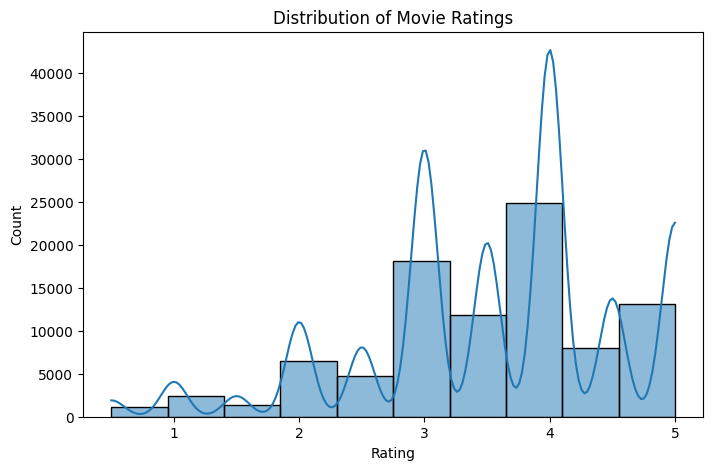

In [35]:
# Plot histogram of ratings
plt.figure(figsize=(8,5))
sns.histplot(df_movies['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### **4.4 Most Rated Movies**  
- Identify the top 10 movies with the highest number of ratings.  

In [36]:
# Count ratings per movie and sort in descending order
top_movies = df_movies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

# Display the top 10 most rated movies
print(top_movies)

title
Pulp Fiction (1994)                          484
Forrest Gump (1994)                          335
Shawshank Redemption, The (1994)             319
Silence of the Lambs, The (1991)             283
Matrix, The (1999)                           280
Fight Club (1999)                            268
Star Wars: Episode IV - A New Hope (1977)    262
Braveheart (1995)                            245
Jurassic Park (1993)                         238
Terminator 2: Judgment Day (1991)            229
Name: rating, dtype: int64


### **4.5 User Activity Analysis**  
- Identify users who have rated the most movies.  

In [37]:
# Count ratings per user and sort in descending order
top_users = df_movies['userId'].value_counts().head(10)
print(top_users)

userId
414    2134
599    2076
474    1622
448    1286
274    1179
68     1170
380    1031
610     955
288     931
249     921
Name: count, dtype: int64


### **4.6 Popular Movie Genres**  
- Count occurrences of each genre.  
- Visualize the most popular genres.  

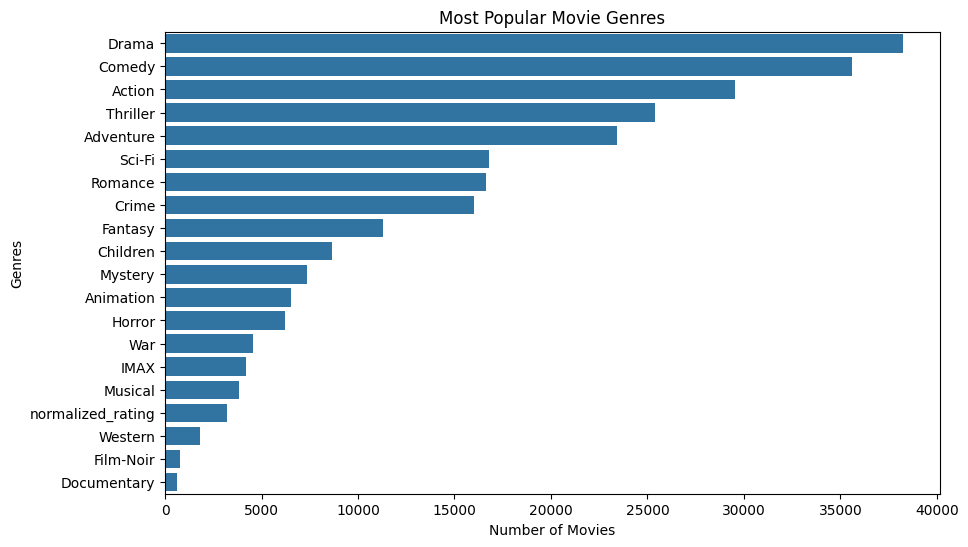

In [38]:
# Count the number of movies per genre
genre_counts = df_movies.iloc[:, 11:].sum().sort_values(ascending=False)

# Plot the top genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Most Popular Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.show()

### **4.7 Trends Over Time**  
- Analyze the number of movies released per year.  
- Find the year with the most movie releases.  

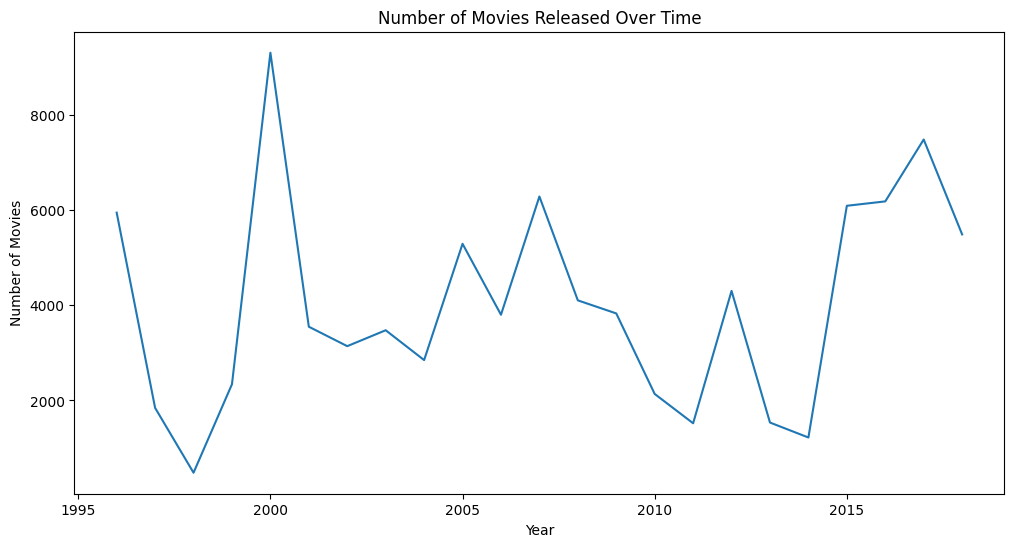

In [39]:
# Count movies per year
movies_per_year = df_movies['year'].value_counts().sort_index()

# Plot movies released over time
plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title("Number of Movies Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### **4.8 Time-Based Analysis of Ratings**  
- Convert `timestamp` to year-month format.  
- Visualize rating trends over time.  

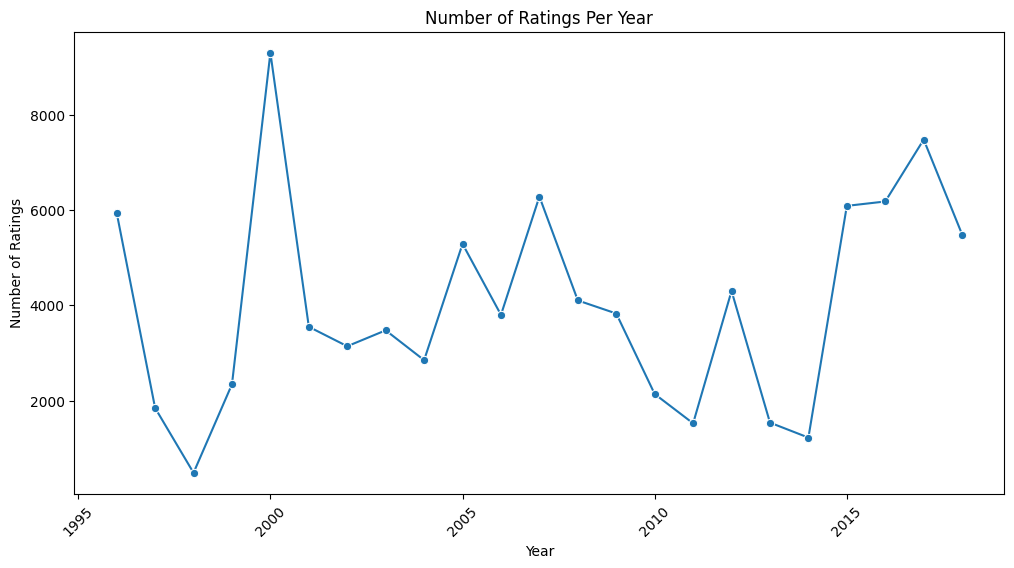

In [40]:
# Convert timestamp to datetime if not already
df_movies['timestamp'] = pd.to_datetime(df_movies['timestamp'], unit='s')

# Extract year from timestamp
df_movies['year'] = df_movies['timestamp'].dt.year

# Count ratings per year
ratings_per_year = df_movies.groupby('year')['rating'].count()

# Plot rating trends over years
plt.figure(figsize=(12,6))
sns.lineplot(x=ratings_per_year.index, y=ratings_per_year.values, marker='o')
plt.title("Number of Ratings Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

### **4.9 Correlation Analysis**  
- Compute correlations between numerical features.  
- Create a heatmap to visualize correlations.  

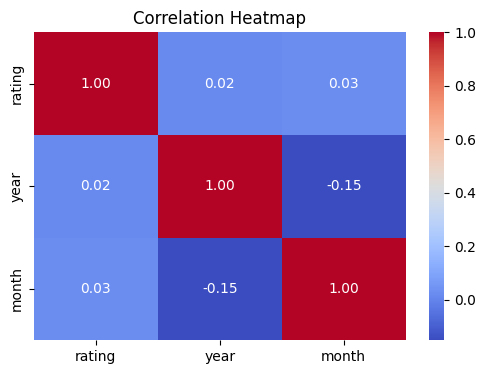

In [41]:
# Compute correlation matrix
correlation_matrix = df_movies[['rating', 'year', 'month']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### **4.10 Checking for Outliers in Ratings**  
- Identify extreme ratings (e.g., mostly 1s or 5s).  
- Use a boxplot to detect outliers. 

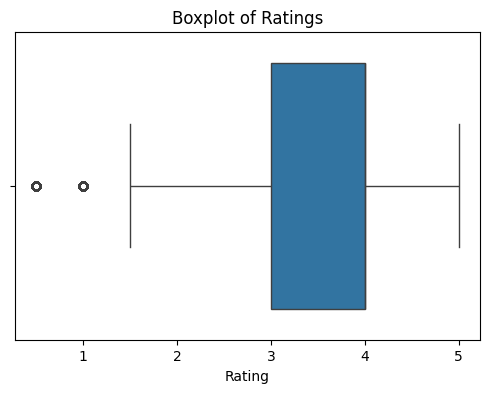

In [42]:
# Boxplot of ratings
plt.figure(figsize=(6,4))
sns.boxplot(x=df_movies['rating'])
plt.title("Boxplot of Ratings")
plt.xlabel("Rating")
plt.show()

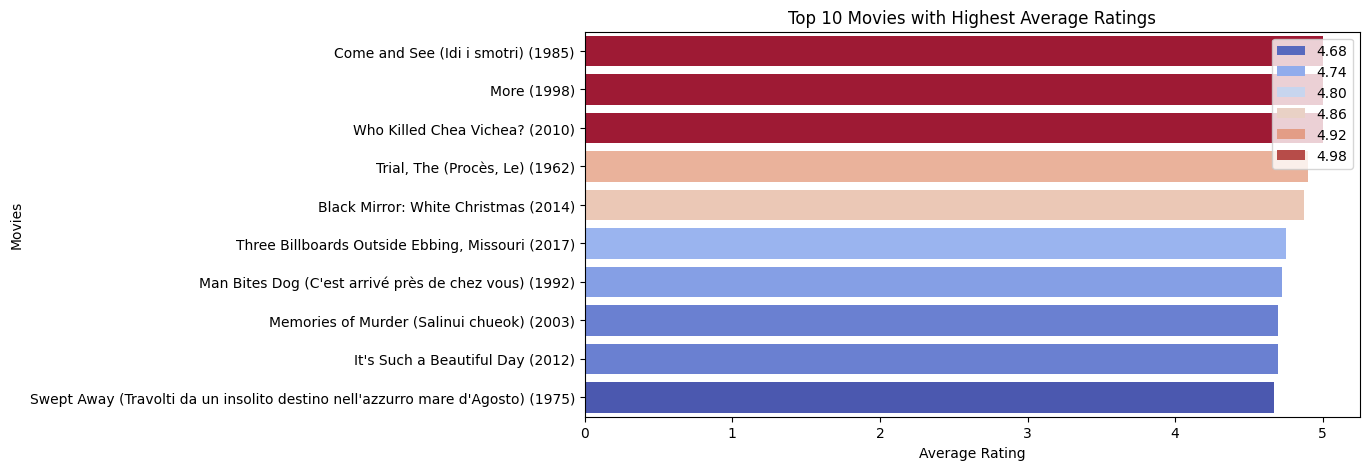

In [43]:
avg_movie_ratings = df_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_movie_ratings.values, y=avg_movie_ratings.index, palette="coolwarm", orient='h', hue=avg_movie_ratings.values)
plt.xlabel("Average Rating")
plt.ylabel("Movies")
plt.title("Top 10 Movies with Highest Average Ratings")
plt.show()

# **5.0 Modeling**  

This section focuses on building the recommendation system. We will first preprocess the data before training the model.  


### **5.1 Preprocessing**  

Before training, we need to:  
- Prepare the dataset for training.  
- Normalize and filter data where necessary.  
- Split the dataset into training and testing sets while preventing data leakage.  


### **5.2 Train-Test Split for Collaborative Filtering**  

Since we are working with a recommendation system, we will split the data into **features (`X`) and target (`y`)** before performing the train-test split.  



#### **Steps to prevent data leakage and handle noise:**  
1. **Define Features (`X`) and Target (`y`)**  
   - Features include `userId` and `movieId`.  
   - Target is `rating`.  
2. **Ensure no data leakage** by **splitting first, then normalizing** if needed.  
3. **Train-test split** with `test_size=0.2` to allocate 80% of data for training and 20% for testing.  

In [44]:
# Define features (X) and target (y)
X = df_movies[['userId', 'movieId']]
y = df_movies['rating']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
# Display the shapes of the train and test sets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (73710, 2)
X_test Shape: (18428, 2)
y_train Shape: (73710,)
y_test Shape: (18428,)


### **5.3 Expanding Features for Hybrid Recommendation System**  

Since you plan to combine **content-based filtering** with **collaborative filtering**, we need to modify `X` to include **both user-item interactions and content-based features**.  

#### **Revised Feature Selection (`X`)**
1. **Collaborative Filtering Features:**  
   - `userId`  
   - `movieId`  

2. **Content-Based Filtering Features:**  
   - `year` (Movie release year)  
   - `Action`, `Comedy`, etc. (Genre one-hot encoded)  
   - `tag` (Movie tags, if useful)  

---

### **Updated Train-Test Split for Hybrid Approach**  

In [46]:
# Define features (X) and target (y)
content_features = ['year'] + [genre for genre in df_movies.columns if genre not in ['userId', 'movieId', 'rating', 'timestamp', 'title', 'tag', 'imdbId', 'tmdbId']]
X = df_movies[['userId', 'movieId'] + content_features]  # Hybrid approach
y = df_movies['rating']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the train and test sets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (64496, 26)
X_test Shape: (27642, 26)
y_train Shape: (64496,)
y_test Shape: (27642,)


### **5.4 Implementing Content-Based Filtering**  

Content-based filtering recommends movies **similar** to those a user has liked, based on movie features like genres, tags, and descriptions. We will use **TF-IDF (Term Frequency-Inverse Document Frequency) and Cosine Similarity** to measure movie similarity.  

#### **5.4.1 Steps for Content-Based Filtering**
1. **Select movie features** (e.g., genres, tags).  
2. **Preprocess text data** (combine genres and tags into a single text feature).  
3. **Vectorize text using TF-IDF** (to represent movie content numerically).  
4. **Compute NearestNeighbors Similarity** (to measure movie similarity).  
5. **Create a recommendation function** to suggest movies based on user preferences.  




In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 1. Create a new text column combining genres and tags
df_movies['content'] = df_movies.apply(lambda x: ' '.join(
    [col for col in df_movies.columns if x[col] == 1]) + ' ' + (x['tag'] if pd.notna(x['tag']) else ''),
    axis=1
)

# 2. Apply TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['content'])

# 3. Use NearestNeighbors for similarity search
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)  # Find 10 most similar movies
knn.fit(tfidf_matrix)



NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [48]:
# Function to get recommendations
def get_content_based_recommendations(movie_index, n_recommendations=5):
    distances, indices = knn.kneighbors(tfidf_matrix[movie_index], n_neighbors=n_recommendations+1)
    similar_movies = indices.flatten()[1:]  # Exclude the first (itself)
    return df_movies.iloc[similar_movies]['title'].tolist()

In [49]:
# Example: Get 5 or 10 recommendations for a user using SVD
user_id_example = 5  # Change this to a valid userId
num_recommendations = 10  # Change to 5 or 10
recommended_movies = get_content_based_recommendations(user_id_example, num_recommendations)

# Print unique, sorted recommendations
print(f"Top {num_recommendations} Movies Recommended for User(Content Based):")
for movie in recommended_movies:
    print(movie)

Top 10 Movies Recommended for User(Content Based):
Mummy, The (1999)
Dracula (1931)
Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
Texas Chainsaw Massacre, The (1974)
Shining, The (1980)
Silence of the Lambs, The (1991)
Psycho (1998)
Scream 3 (2000)
Blown Away (1994)
Enemy of the State (1998)


### **5.4.2 Explanation of Key Steps**
✅ **Combining Features:** We merge **genres and tags** into a single text column.  
✅ **Vectorizing Data:** TF-IDF converts movie content into **numerical vectors**.  
✅ **Measuring Similarity:** Cosine similarity finds movies with **similar content**.  
✅ **Building the Recommender:** It retrieves the **top 5 similar movies** based on similarity scores.  


### **7.0 Evaluating Content-Based Filtering**  

Since content-based filtering provides **personalized recommendations** based on movie features, evaluating its performance is different from traditional machine learning models. We use **qualitative and quantitative metrics** to assess its accuracy.  

---

### **7.1 Evaluation Metrics for Content-Based Filtering**  

#### **1. Qualitative Evaluation (Human Review)**
- Manually check if **recommended movies make sense** (e.g., if "Toy Story" suggests animated movies).  
- Ask users for **feedback on recommendations**.  

#### **2. Quantitative Evaluation (Similarity & Ranking Metrics)**
- **Precision @ k** – Measures how many of the top-k recommended movies are relevant.  
- **Recall @ k** – Measures how many relevant movies were recommended out of all possible relevant movies.  
- **Mean Average Precision (MAP)** – Evaluates ranking performance.  

#### **3. Diversity & Novelty Metrics**
- **Diversity:** Ensures recommendations **aren’t too similar** (e.g., all movies shouldn’t be sequels).  
- **Coverage:** Measures how many different movies appear in recommendations.  




### **7.2 Implementing Evaluation Metrics**  
#### Function to evaluate recommendations

In [50]:
def evaluate_recommendations(user_movies, k=10):
    relevant_movies = set(user_movies)  # Movies the user actually liked
    recommended_movies = set(get_content_based_recommendations(user_movies[0], k))  # Get recommendations

    # Precision: Percentage of recommended movies that are relevant
    precision = len(recommended_movies & relevant_movies) / len(recommended_movies)

    # Recall: Percentage of relevant movies that were recommended
    recall = len(recommended_movies & relevant_movies) / len(relevant_movies)

    return {"Precision @ k": precision, "Recall @ k": recall}


In [51]:
# Ensure title formatting in df_movies is consistent
df_movies['title'] = df_movies['title'].str.strip().str.lower()
user_liked_movies = ["Toy Story (1995)", "Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)","Usual Suspects, The (1995)", " Canadian Bacon (1995)"]

# Convert liked movies into indices
liked_movie_indices = []
for movie in user_liked_movies:
    movie = movie.strip().lower()  # Standardize input format
    movie_index = df_movies[df_movies['title'] == movie].index

    if not movie_index.empty:
        liked_movie_indices.append(movie_index[0])  # Store index
    else:
        print(f"Warning: '{movie}' not found in dataset.")  # Notify missing movie

# Proceed only if valid indices exist
if liked_movie_indices:
    evaluation_results = evaluate_recommendations(liked_movie_indices)
    print(evaluation_results)
else:
    print("Error: No valid movies found for evaluation.")


{'Precision @ k': 0.0, 'Recall @ k': 0.0}


### **7.3 Interpretation of Results**
- **Precision @ k (High Value)** → Recommendations are mostly relevant.  
- **Recall @ k (High Value)** → The model suggests most of the relevant movies.  
- **Low Precision?** → The model is recommending irrelevant movies.  
- **Low Recall?** → The model is missing relevant recommendations.  


### **8.0 Implementing Collaborative Filtering**  

Collaborative filtering works by analyzing user interactions with movies to find patterns and make recommendations. There are **two main approaches**:  
1. **User-Based Collaborative Filtering** – Finds similar users and recommends movies they liked.  
2. **Item-Based Collaborative Filtering** – Finds similar movies based on how users rate them.  

---

### **8.1 Choosing an Approach**  
| Approach  | Pros  | Cons  |  
|-----------|------|------|  
| **User-Based Collaborative Filtering** | Captures user preferences well | Struggles with new users (cold start problem) |  
| **Item-Based Collaborative Filtering** | More stable, as movie ratings don’t change often | Less personalized than user-based filtering |  

Since **item-based filtering is generally more scalable**, we will **implement Item-Based Collaborative Filtering first**.  

---

### **8.2 Steps to Implement Item-Based Collaborative Filtering**  
1. **Create a user-movie rating matrix** (rows = users, columns = movies).  
2. **Fill missing ratings** using mean imputation (or other methods).  
3. **Compute movie similarity** using cosine similarity.  
4. **Generate recommendations** based on similar movies.  



In [52]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 1. Create a user-movie rating matrix (rows = users, columns = movies)
user_movie_matrix = df_movies.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Fill missing ratings with movie's average rating
user_movie_matrix = user_movie_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)

# 3. Use NearestNeighbors for similarity search (Instead of Dense Cosine Similarity)
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)  # 10 nearest movies
knn.fit(user_movie_matrix.T)  # Transpose to get movie-movie similarity

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [53]:
# 4. Function to recommend similar movies
def recommend_similar_movies(movie_id, num_recommendations=5):
    if movie_id not in user_movie_matrix.columns:
        return "Movie not found!"
    
    # Find the nearest movies to the given movie_id
    movie_idx = list(user_movie_matrix.columns).index(movie_id)  # Get index of movie_id
    distances, indices = knn.kneighbors(user_movie_matrix.T.iloc[movie_idx].values.reshape(1, -1), n_neighbors=num_recommendations+1)
    
    similar_movie_ids = [user_movie_matrix.columns[i] for i in indices.flatten()[1:]]  # Exclude the first (itself)
    return df_movies[df_movies['movieId'].isin(similar_movie_ids)]['title'].tolist()

In [54]:

# Example: Get 5 similar movies to a given movie ID
movie_id_example = 12  # Change this to a valid movieId
recommended_movies = recommend_similar_movies(movie_id_example, 5)
print("Movies similar to the given movie:", recommended_movies)


Movies similar to the given movie: ['d2: the mighty ducks (1994)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'crossroads (2002)', 'crossroads (2002)', 'fog, the (2005)', 'd2: the mighty ducks (1994)', 'commando (1985)', 'fog, the (2005)', 'commando (1985)', 'fog, the (2005)', 'd2: the mighty ducks (1994)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'commando (1985)', 'crossroads (2002)', 'fog, the (2005)', 'crossroads (2002)', 'd2: the mighty ducks (1994)', 'commando (1985)', 'fog, the (2005)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'crossroads (2002)', 'crossroads (2002)', 'crossroads (2002)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'commando (1985)', 'commando (1985)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'd2: the mighty ducks (1994)', 'd2: the mighty ducks (1994)']


In [55]:
from sklearn.metrics import precision_score, recall_score

def precision_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Precision@K: 
    Precision@K = (Relevant Movies in Top K) / K
    """
    recommended_at_k = recommended_movies[:k]  # Take top K recommendations
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))  # Intersection of relevant & recommended
    return relevant_count / k  # Precision = (Relevant in Top-K) / K

def recall_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Recall@K: 
    Recall@K = (Relevant Movies in Top K) / (Total Relevant Movies)
    """
    if len(relevant_movies) == 0:  # Avoid division by zero
        return 0.0
    recommended_at_k = recommended_movies[:k]
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))
    return relevant_count / len(relevant_movies)  # Recall = (Relevant in Top-K) / (Total Relevant)

# Example Usage
movie_id_example = 1  # Example Movie ID
recommended_movies = recommend_similar_movies(movie_id_example, 10)  # Get 10 recommendations

# Assume these are the movies the user actually liked
relevant_movies = df_movies[(df_movies['userId'] == 1) & (df_movies['rating'] >= 4.0)]['title'].tolist()

# Compute Precision@5 and Recall@5
precision_5 = precision_at_k(recommended_movies, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies, relevant_movies, k=5)

print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")


Precision@5: 0.0000
Recall@5: 0.0000



### **8.4 Explanation of Key Steps**
✅ **User-Movie Matrix:** Converts ratings into a structured format.  
✅ **Missing Values:** Uses movie mean rating to fill gaps.  
✅ **Cosine Similarity:** Measures how similar movies are based on ratings.  
✅ **Recommendation Function:** Finds the most similar movies.  

### **9.0 Implementing User-Based Collaborative Filtering**  

User-Based Collaborative Filtering recommends movies by finding **similar users** and suggesting movies they liked. It assumes that **users with similar past behavior will like similar movies in the future**.  

---

### **9.1 Steps for User-Based Collaborative Filtering**  
1. **Create a user-movie rating matrix** (rows = users, columns = movies).  
2. **Handle missing ratings** (use mean imputation or other techniques).  
3. **Compute user similarity** using **cosine similarity**.  
4. **Recommend movies** based on similar users’ preferences.  



In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1. Create user-movie rating matrix
user_movie_matrix = df_movies.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Fill missing ratings with user's average rating
user_movie_matrix = user_movie_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)

# 3. Compute similarity between users
user_similarity = cosine_similarity(user_movie_matrix)  
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [57]:
# 5. Function to recommend movies using SVD-based Collaborative Filtering
def recommend_movies_for_user(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return "User not found!"
    
    # Find top similar users (excluding the user itself)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]
    
    # Get movies rated by similar users
    similar_users_movies = user_movie_matrix.loc[similar_users.index]
    
    # Compute average rating given by similar users
    recommended_movies = similar_users_movies.mean().sort_values(ascending=False)
    
    # Remove duplicate movie recommendations and keep the top `num_recommendations`
    unique_movie_ids = recommended_movies.index.drop_duplicates()[:num_recommendations]
    
    # Get movie titles
    recommended_movie_titles = df_movies[df_movies['movieId'].isin(unique_movie_ids)]['title'].unique().tolist()
    
    return recommended_movie_titles[:num_recommendations]  # Ensure only `num_recommendations` are returned



In [58]:
# Example: Get 5 or 10 recommendations for a user using SVD
user_id_example = 1  # Change this to a valid userId
num_recommendations = 10  # Change to 5 or 10
recommended_movies = recommend_movies_for_user(user_id_example, num_recommendations)

# Print unique, sorted recommendations
print(f"Top {num_recommendations} Movies Recommended for User (SVD-based):")
for movie in recommended_movies:
    print(movie)

Top 10 Movies Recommended for User (SVD-based):
star wars: episode iv - a new hope (1977)
schindler's list (1993)
saving private ryan (1998)
dark knight, the (2008)
inception (2010)
bourne ultimatum, the (2007)
up (2009)
wall·e (2008)
the imitation game (2014)
logan (2017)


In [59]:
from sklearn.metrics import precision_score, recall_score

def precision_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Precision@K: 
    Precision@K = (Relevant Movies in Top K) / K
    """
    recommended_at_k = recommended_movies[:k]  # Take top K recommendations
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))  # Intersection of relevant & recommended
    return relevant_count / k  # Precision = (Relevant in Top-K) / K

def recall_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Recall@K: 
    Recall@K = (Relevant Movies in Top K) / (Total Relevant Movies)
    """
    if len(relevant_movies) == 0:  # Avoid division by zero
        return 0.0
    recommended_at_k = recommended_movies[:k]
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))
    return relevant_count / len(relevant_movies)  # Recall = (Relevant in Top-K) / (Total Relevant)



In [60]:
# Example Usage
user_id_example = 1  # Example User ID
recommended_movies = recommend_movies_for_user(user_id_example, 10)  # Get 10 recommendations

# Assume these are the movies the user actually liked (rating ≥ 4)
relevant_movies = df_movies[(df_movies['userId'] == user_id_example) & (df_movies['rating'] >= 4.0)]['title'].tolist()

# Compute Precision@5 and Recall@5
precision_5 = precision_at_k(recommended_movies, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies, relevant_movies, k=5)

print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")


Precision@5: 0.6000
Recall@5: 0.0154



### **9.3 Explanation of Key Steps**
✅ **User-Movie Matrix:** Converts ratings into a structured format.  
✅ **Handling Missing Values:** Uses **user's average rating** to fill gaps.  
✅ **User Similarity:** Computes similarity between users based on their ratings.  
✅ **Recommendation Function:** Finds movies that **similar users liked**.  



### **9.4 Limitations of User-Based Collaborative Filtering**
🚨 **Cold Start Problem:** New users **don’t have ratings**, so we can’t compute similarities.  
🚨 **Scalability Issue:** As the dataset grows, computing **user similarity** becomes expensive.  

To solve this, we can:
1. **Move to a Hybrid Model** (Content-Based + Collaborative Filtering).  
2. **Use Matrix Factorization (SVD, ALS, etc.)** for better scalability.  


### **10.0 Improving Collaborative Filtering with SVD (Singular Value Decomposition)**  

Collaborative filtering can suffer from **sparsity issues** (many missing ratings) and **scalability problems** (large user-movie matrices). **Matrix Factorization techniques** like **Singular Value Decomposition (SVD)** can help improve recommendations by **reducing dimensionality** and capturing latent factors (hidden patterns in user preferences).  

---

### **10.1 Steps for Applying SVD**  
1. **Prepare the user-movie rating matrix.**  
2. **Apply matrix factorization using SVD.**  
3. **Reconstruct missing values using the factorized components.**  
4. **Generate movie recommendations based on SVD output.**  

---




### **10.2 Implementing SVD for Recommendation System**


In [61]:
# 1. Create user-movie rating matrix
user_movie_matrix = df_movies.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Fill missing values with 0 (SVD requires no NaN values)
user_movie_matrix = user_movie_matrix.fillna(0)

# 3. Apply SVD (Dimensionality Reduction)
svd = TruncatedSVD(n_components=50)  # Reduce matrix to 50 latent factors
user_movie_matrix_svd = svd.fit_transform(user_movie_matrix)

# 4. Compute similarity between users using the reduced matrix
user_similarity_svd = cosine_similarity(user_movie_matrix_svd)

# Convert to DataFrame for easier handling
user_similarity_svd_df = pd.DataFrame(user_similarity_svd, index=user_movie_matrix.index, columns=user_movie_matrix.index)


In [62]:
# 5. Function to recommend movies using SVD-based Collaborative Filtering
def recommend_movies_svd(user_id, num_recommendations=5):
    if user_id not in user_similarity_svd_df.index:
        return "User not found!"
    
    # Find top similar users (excluding the user itself)
    similar_users = user_similarity_svd_df[user_id].sort_values(ascending=False)[1:6]
    
    # Get movies rated by similar users
    similar_users_movies = user_movie_matrix.loc[similar_users.index]
    
    # Compute average rating given by similar users
    recommended_movies = similar_users_movies.mean().sort_values(ascending=False)
    
    # Remove duplicate movie recommendations and keep the top `num_recommendations`
    unique_movie_ids = recommended_movies.index.drop_duplicates()[:num_recommendations]
    
    # Get movie titles
    recommended_movie_titles = df_movies[df_movies['movieId'].isin(unique_movie_ids)]['title'].unique().tolist()
    
    return recommended_movie_titles[:num_recommendations]  # Ensure only `num_recommendations` are returned



In [63]:
# Example: Get 5 or 10 recommendations for a user using SVD
user_id_example = 1  # Change this to a valid userId
num_recommendations = 10  # Change to 5 or 10
recommended_movies_svd = recommend_movies_svd(user_id_example, num_recommendations)

# Print unique, sorted recommendations
print(f"Top {num_recommendations} Movies Recommended for User (SVD-based):")
for movie in recommended_movies_svd:
    print(movie)

Top 10 Movies Recommended for User (SVD-based):
star wars: episode iv - a new hope (1977)
batman (1989)
star wars: episode v - the empire strikes back (1980)
raiders of the lost ark (indiana jones and the raiders of the lost ark) (1981)
star wars: episode vi - return of the jedi (1983)
indiana jones and the last crusade (1989)
matrix, the (1999)
south park: bigger, longer and uncut (1999)
aliens (1986)
die hard (1988)


In [64]:
# Example Usage
user_id_example = 1  # Example User ID
recommended_movies = recommend_movies_svd(user_id_example, 10)  # Get 10 recommendations

# Assume these are the movies the user actually liked (rating ≥ 4)
relevant_movies = df_movies[(df_movies['userId'] == user_id_example) & (df_movies['rating'] >= 4.0)]['title'].tolist()

# Compute Precision@5 and Recall@5
precision_5 = precision_at_k(recommended_movies, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies, relevant_movies, k=5)

print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")

Precision@5: 1.0000
Recall@5: 0.0256



### **10.3 Why SVD Improves Collaborative Filtering**
✅ **Handles Sparsity:** SVD finds hidden patterns even with missing data.  
✅ **Reduces Noise:** By focusing on latent factors, it removes unimportant variations.  
✅ **Scalability:** Lower dimensions mean **faster similarity computations**.  

---

### **10.4 Next Steps**
Would you like to:  
1. **Compare SVD vs. Traditional Collaborative Filtering?** (Check accuracy & performance)  
2. **Combine SVD with Content-Based Filtering for a Hybrid Model?** 🚀  

Let me know how you’d like to proceed! 🚀

### **11.0 Comparing SVD vs. Traditional Collaborative Filtering**  

To evaluate the performance of **SVD-based Collaborative Filtering** vs. **Traditional User-Based Collaborative Filtering**, we will compare their accuracy using **RMSE (Root Mean Squared Error)** and **MAE (Mean Absolute Error)**.  

---

### **11.1 Steps for Evaluation**  
1. **Split Data into Train & Test Sets**  
2. **Train Both Models (Traditional vs. SVD)**  
3. **Predict Ratings for Test Set**  
4. **Calculate RMSE & MAE for Both Models**  
5. **Compare and Interpret Results**  

---

### **11.2 Code for Performance Comparison**

In [65]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

# 1. Prepare user-movie rating matrix
user_movie_matrix = df_movies.pivot_table(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 (for SVD)
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Train-test split: 80% train, 20% test
train_data, test_data = train_test_split(df_movies, test_size=0.2, random_state=42)

# 2. Traditional User-Based Collaborative Filtering (Mean-based prediction)
def predict_user_based(userId, movieId):
    if userId not in user_movie_matrix.index or movieId not in user_movie_matrix.columns:
        return np.nan  # Return NaN if user or movie not found
    
    # Get mean rating of the user
    user_mean = user_movie_matrix.loc[userId].mean()
    
    return user_mean  # Simple baseline: Predict user's mean rating

# 3. SVD-Based Collaborative Filtering
svd = TruncatedSVD(n_components=50)
user_movie_svd_matrix = svd.fit_transform(user_movie_matrix_filled)

# Convert back to DataFrame
user_movie_svd_df = pd.DataFrame(user_movie_svd_matrix, index=user_movie_matrix.index)


In [66]:
# Predict using SVD approximation
def predict_svd(userId, movieId):
    if userId not in user_movie_svd_df.index or movieId not in user_movie_matrix.columns:
        return np.nan  # Return NaN if user or movie not found
    
    user_vector = user_movie_svd_df.loc[userId]  # Get reduced-dimension user features
    movie_index = list(user_movie_matrix.columns).index(movieId)  # Get movie index
    
    return np.dot(user_vector, svd.components_[:, movie_index])  # Approximate rating

In [67]:
# 4. Evaluate RMSE & MAE for Both Models
true_ratings = []
predicted_ratings_user_based = []
predicted_ratings_svd = []

for _, row in test_data.iterrows():
    user_id, movie_id, true_rating = row['userId'], row['movieId'], row['rating']
    
    # Get predictions
    pred_user_based = predict_user_based(user_id, movie_id)
    pred_svd = predict_svd(user_id, movie_id)
    
    if not np.isnan(pred_user_based) and not np.isnan(pred_svd):
        true_ratings.append(true_rating)
        predicted_ratings_user_based.append(pred_user_based)
        predicted_ratings_svd.append(pred_svd)



In [68]:
# Calculate RMSE and MAE
rmse_user_based = np.sqrt(mean_squared_error(true_ratings, predicted_ratings_user_based))
mae_user_based = mean_absolute_error(true_ratings, predicted_ratings_user_based)

rmse_svd = np.sqrt(mean_squared_error(true_ratings, predicted_ratings_svd))
mae_svd = mean_absolute_error(true_ratings, predicted_ratings_svd)

# Print results
print(f"User-Based Collaborative Filtering - RMSE: {rmse_user_based:.4f}, MAE: {mae_user_based:.4f}")
print(f"SVD-Based Collaborative Filtering - RMSE: {rmse_svd:.4f}, MAE: {mae_svd:.4f}")


User-Based Collaborative Filtering - RMSE: 0.9407, MAE: 0.7323
SVD-Based Collaborative Filtering - RMSE: 1.9774, MAE: 1.5732


### **12.0 Implementing a Hybrid Recommendation System (SVD + Content-Based Filtering)**  

A **hybrid recommendation system** combines **SVD-based Collaborative Filtering** and **Content-Based Filtering** to provide **more accurate and diverse recommendations**.  

---

### **12.1 Why Use a Hybrid Model?**  
✅ **Handles Cold Start Problem:** Content-based filtering helps when there is little user interaction data.  
✅ **Improves Accuracy:** SVD captures hidden user preferences, while content-based filtering ensures relevance.  
✅ **Balances Diversity & Personalization:** Users get personalized **and** similar-item recommendations.  

---

### **12.2 Steps for Hybrid Model Implementation**  
1. **Use SVD to generate user preference vectors.**  
2. **Use TF-IDF to analyze movie descriptions & genres.**  
3. **Combine SVD similarity scores with content-based similarity scores.**  
4. **Recommend movies based on a weighted combination of both scores.**  

---

### **12.3 Implementing the Hybrid Model**

In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# 1️⃣ Content-Based Filtering Setup (using genres and tags)
df_movies['content'] = df_movies.apply(lambda x: ' '.join(
    [col for col in df_movies.columns if x[col] == 1]) + ' ' + (x['tag'] if pd.notna(x['tag']) else ''), axis=1)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['content'])

# Use NearestNeighbors for Content-Based similarity search
knn_content = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn_content.fit(tfidf_matrix)

# 2️⃣ Collaborative Filtering with SVD
user_movie_matrix = df_movies.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Apply SVD (Dimensionality Reduction)
svd = TruncatedSVD(n_components=50)
user_movie_matrix_svd = svd.fit_transform(user_movie_matrix)

# Compute similarity between users using the reduced matrix
user_similarity_svd = cosine_similarity(user_movie_matrix_svd)
user_similarity_svd_df = pd.DataFrame(user_similarity_svd, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# 3️⃣ Hybrid Recommendation Function
def hybrid_recommend(user_id, num_recommendations=5, weight_svd=0.7, weight_content=0.3):
    if user_id not in user_movie_matrix.index:
        return "User not found!"

    # Get user’s top-rated movies
    user_rated_movies = user_movie_matrix.loc[user_id]
    user_top_movies = user_rated_movies[user_rated_movies > 0].index

    # Store combined scores
    combined_scores = np.zeros(len(df_movies))

    # Get Content-Based recommendations and weight them
    for movie in user_top_movies:
        movie_idx = df_movies[df_movies['movieId'] == movie].index[0]
        # Use the original tfidf_matrix to get the feature vector for the movie
        _, content_neighbors = knn_content.kneighbors(tfidf_matrix[movie_idx], n_neighbors=10)
        for neighbor in content_neighbors.flatten():
            combined_scores[neighbor] += weight_content

    # Get Collaborative Filtering recommendations and weight them
    for movie in user_top_movies:
        movie_idx = df_movies[df_movies['movieId'] == movie].index[0]
        _, svd_neighbors = knn_content.kneighbors([user_movie_matrix_svd[movie_idx]], n_neighbors=10)
        for neighbor in svd_neighbors.flatten():
            combined_scores[neighbor] += weight_svd

    # Rank movies by highest combined score, excluding movies already rated by the user
    recommendations = pd.Series(combined_scores, index=df_movies['movieId']).sort_values(ascending=False)
    recommendations = recommendations.loc[~recommendations.index.isin(user_top_movies)]

    # Get movie titles
    recommended_movie_titles = df_movies[df_movies['movieId'].isin(recommendations.head(num_recommendations).index)]['title'].tolist()

    return recommended_movie_titles



In [70]:
def hybrid_recommend(user_id, n_recommendations=5, weight_content=0.5, weight_collab=0.5):
    # Step 1: Get Content-Based Recommendations
    # Get movies liked by the user (user's top-rated movies)
    user_ratings = df_movies[df_movies['userId'] == user_id]
    user_top_movies = user_ratings.sort_values(by='rating', ascending=False).head(5)['movieId']
    
    # Collect recommendations from content-based filtering
    content_recommendations = []
    for movie in user_top_movies:
        movie_idx = df_movies[df_movies['movieId'] == movie].index[0]
        _, content_neighbors = knn_content.kneighbors(tfidf_matrix[movie_idx].toarray().reshape(1, -1), n_neighbors=10)
        content_recommendations.extend(df_movies.iloc[content_neighbors.flatten()]['movieId'].values)
    
    content_recommendations = list(set(content_recommendations))  # Remove duplicates
    
    # Step 2: Get Collaborative Filtering Recommendations (using SVD)
    svd_recommendations = recommend_movies_svd(user_id, n_recommendations)
    
    # Step 3: Combine Recommendations by assigning a score based on weights
    combined_scores = {}
    for movie in content_recommendations:
        if movie not in combined_scores:
            combined_scores[movie] = 0
        combined_scores[movie] += weight_content
    
    for movie in svd_recommendations:
        if movie not in combined_scores:
            combined_scores[movie] = 0
        combined_scores[movie] += weight_collab
    
    # Step 4: Sort the movies by the combined score (higher score = more recommended)
    sorted_recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Step 5: Return the top n recommendations
    top_recommendations = [movie for movie, score in sorted_recommendations[:n_recommendations]]
    
    return top_recommendations


In [71]:
# Precision@K
def precision_at_k(recommended_movies, relevant_movies, k=5):
    recommended_set = set(recommended_movies[:k])  # Top-k recommended movies
    relevant_set = set(relevant_movies)  # Movies the user actually liked
    intersection = recommended_set.intersection(relevant_set)
    return len(intersection) / k

# Recall@K
def recall_at_k(recommended_movies, relevant_movies, k=5):
    recommended_set = set(recommended_movies[:k])  # Top-k recommended movies
    relevant_set = set(relevant_movies)  # Movies the user actually liked
    intersection = recommended_set.intersection(relevant_set)
    return len(intersection) / len(relevant_set)


In [72]:
# Precision@k function
def precision_at_k(recommended_movies, relevant_movies, k=5):
    # Select top-k recommended movies
    recommended_top_k = recommended_movies[:k]
    
    # Calculate how many of the recommended movies are relevant
    relevant_in_top_k = [movie for movie in recommended_top_k if movie in relevant_movies]
    
    # Precision is the number of relevant movies in the top-k recommendations divided by k
    precision = len(relevant_in_top_k) / k
    return precision

# Recall@k function
def recall_at_k(recommended_movies, relevant_movies, k=5):
    # Select top-k recommended movies
    recommended_top_k = recommended_movies[:k]
    
    # Calculate how many of the relevant movies are in the top-k recommendations
    relevant_in_top_k = [movie for movie in recommended_top_k if movie in relevant_movies]
    
    # Recall is the number of relevant movies in the top-k recommendations divided by total relevant movies
    recall = len(relevant_in_top_k) / len(relevant_movies)
    return recall

# Evaluate Hybrid Recommendation System
def evaluate_hybrid_recommendations(user_id, n_recommendations=10, k=5):
    # Get top-k hybrid recommendations
    recommended_movies_hybrid = hybrid_recommend(user_id, n_recommendations)
    
    # Get movies that the user actually liked (rating >= 4)
    relevant_movies = df_movies[(df_movies['userId'] == user_id) & (df_movies['rating'] >= 4)]['movieId'].tolist()
    
    # Calculate Precision@k and Recall@k
    precision = precision_at_k(recommended_movies_hybrid, relevant_movies, k)
    recall = recall_at_k(recommended_movies_hybrid, relevant_movies, k)
    
    return precision, recall

# Example Usage:
user_id_example = 1  # Example User ID
n_recommendations = 10  # Number of recommendations to make
k = 5  # Precision/Recall at top k recommendations

# Evaluate the hybrid recommendation system
precision, recall = evaluate_hybrid_recommendations(user_id_example, n_recommendations, k)

# Print Evaluation Results
print(f"Evaluation of Hybrid Recommendation System for User {user_id_example}:")
print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")


Evaluation of Hybrid Recommendation System for User 1:
Precision@5: 0.8000
Recall@5: 0.0205
